# MAL Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import pickle
import re

In [2]:
# Open API dataframe we created in Data_Collection.py
with open("datasets/anime_details.p", "rb") as f:
    df = pickle.load(f)
    f.close()

df = df.rename(columns = {'mean':'rating'}) # Rename the "mean" column to "rating" to avoid confusion
df = df.loc[df.status == "finished_airing"] # Only look at the population of finished TV anime
df.head(3)

,id,title,alternative_titles,start_date,synopsis,rating,popularity,status,average_episode_duration,genres,num_episodes,studios,source,related_anime,related_manga,main_picture
0,5114,Fullmetal Alchemist: Brotherhood,{'synonyms': ['Hagane no Renkinjutsushi: Fullm...,2009-04-05,"""In order for something to be obtained, someth...",9.16,3,finished_airing,1460,"[{'id': 1, 'name': 'Action'}, {'id': 38, 'name...",64,"[{'id': 4, 'name': 'Bones'}]",manga,"[{'node': {'id': 121, 'title': 'Fullmetal Alch...",[],{'medium': 'https://api-cdn.myanimelist.net/im...
1,38524,Shingeki no Kyojin Season 3 Part 2,"{'synonyms': [], 'en': 'Attack on Titan Season...",2019-04-29,Seeking to restore humanity's diminishing hope...,9.10,36,finished_airing,1435,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",10,"[{'id': 858, 'name': 'Wit Studio'}]",manga,"[{'node': {'id': 35760, 'title': 'Shingeki no ...",[],{'medium': 'https://api-cdn.myanimelist.net/im...
2,9253,Steins;Gate,"{'synonyms': [], 'en': 'Steins;Gate', 'ja': 'S...",2011-04-06,The self-proclaimed mad scientist Rintarou Oka...,9.10,11,finished_airing,1460,"[{'id': 24, 'name': 'Sci-Fi'}, {'id': 40, 'nam...",24,"[{'id': 314, 'name': 'White Fox'}]",visual_novel,"[{'node': {'id': 4975, 'title': 'ChäoS;HEAd', ...",[],{'medium': 'https://api-cdn.myanimelist.net/im...


In [3]:
# Review NaN values in dataset
df.isnull().sum()

id                             0
title                          0
alternative_titles             0
start_date                    23
synopsis                       0
rating                      1132
popularity                     0
status                         0
average_episode_duration       0
genres                         4
num_episodes                   0
studios                        0
source                       812
related_anime                  0
related_manga                  0
main_picture                   4
dtype: int64

# Feature Engineering

Although there are many useful variables directly from the API, we can also extract new variables from our dataset, such as title/synopsis length, polarity of the title, and the colorfulness of the main anime picture!

In [4]:
# Module in the server directory; contains functions to act on our dataset
import server.utils.eda_utils as eu

In [5]:
# Title functions
df['en_title'] = eu.make_en_titles(df)
df['title_len'] = df['en_title'].apply(eu.get_len_text)
df['synopsis_len'] = df['synopsis'].apply(eu.get_len_text)

# Date functions
df['year'] = df['start_date'].apply(eu.get_start_year)
df['decade'] = df['year'].apply(eu.bin_year)

# Categorical functions
df['genre_names'] = df['genres'].apply(eu.get_genre_list)
df['studio_names'] = df['studios'].apply(eu.get_studio_list)

# Sentiment functions
df['synop_pol'] = df['synopsis'].apply(eu.get_polarity)
df['title_pol'] = df['en_title'].apply(eu.get_polarity)
df['synop_subj'] = df['synopsis'].apply(eu.get_subjectivity)
df['title_subj'] = df['en_title'].apply(eu.get_subjectivity)

# Number of related anime/manga functions
df['num_related_anime'] = df['related_anime'].apply(eu.get_related_animes)
df['num_related_manga'] = df['related_manga'].apply(eu.get_related_manga)
df['num_genres'] = df['genre_names'].apply(eu.get_len_list)
df['num_studios'] = df['studio_names'].apply(eu.get_len_list)

# Picture functions
df['med_size_pic'] = df['main_picture'].apply(eu.get_med_pic)
df['image_name'] = df['med_size_pic'].apply(eu.get_pic_name)

# Review changes
df.head(3)

,id,title,alternative_titles,start_date,synopsis,rating,popularity,status,average_episode_duration,genres,...,synop_pol,title_pol,synop_subj,title_subj,num_related_anime,num_related_manga,num_genres,num_studios,med_size_pic,image_name
0,5114,Fullmetal Alchemist: Brotherhood,{'synonyms': ['Hagane no Renkinjutsushi: Fullm...,2009-04-05,"""In order for something to be obtained, someth...",9.16,3,finished_airing,1460,"[{'id': 1, 'name': 'Action'}, {'id': 38, 'name...",...,-0.021627,0.0,0.486310,0.0,4,0,8.0,1.0,https://api-cdn.myanimelist.net/images/anime/1...,96541.jpg
1,38524,Shingeki no Kyojin Season 3 Part 2,"{'synonyms': [], 'en': 'Attack on Titan Season...",2019-04-29,Seeking to restore humanity's diminishing hope...,9.10,36,finished_airing,1435,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",...,-0.041019,0.0,0.437778,0.0,3,0,7.0,1.0,https://api-cdn.myanimelist.net/images/anime/1...,100633.jpg
2,9253,Steins;Gate,"{'synonyms': [], 'en': 'Steins;Gate', 'ja': 'S...",2011-04-06,The self-proclaimed mad scientist Rintarou Oka...,9.10,11,finished_airing,1460,"[{'id': 24, 'name': 'Sci-Fi'}, {'id': 40, 'nam...",...,-0.029167,0.0,0.426389,0.0,7,0,4.0,1.0,https://api-cdn.myanimelist.net/images/anime/5...,73199.jpg


In [6]:
# Functions for collecting pictures and extracting a "colorfulness" value
eu.write_pics(df['med_size_pic'])
df['pic_colorfulness'] = eu.get_colorfulness_list(df['image_name'])

96541.jpg exists! Moving to next anime...
100633.jpg exists! Moving to next anime...
73199.jpg exists! Moving to next anime...
72078.jpg exists! Moving to next anime...
114792.jpg exists! Moving to next anime...
50361.jpg exists! Moving to next anime...
33657.jpg exists! Moving to next anime...
75172.jpg exists! Moving to next anime...
83528.jpg exists! Moving to next anime...
88469.jpg exists! Moving to next anime...
110774.jpg exists! Moving to next anime...
73274.jpg exists! Moving to next anime...
110531.jpg exists! Moving to next anime...
87322.jpg exists! Moving to next anime...
9391.jpg exists! Moving to next anime...
96566.jpg exists! Moving to next anime...
89603.jpg exists! Moving to next anime...
81992.jpg exists! Moving to next anime...
96303.jpg exists! Moving to next anime...
113348.jpg exists! Moving to next anime...
18793.jpg exists! Moving to next anime...
52133.jpg exists! Moving to next anime...
19644.jpg exists! Moving to next anime...
82947.jpg exists! Moving to ne

In [7]:
# Review NaN values after feature engineering
df.isnull().sum()

id                             0
title                          0
alternative_titles             0
start_date                    23
synopsis                       0
rating                      1132
popularity                     0
status                         0
average_episode_duration       0
genres                         4
num_episodes                   0
studios                        0
source                       812
related_anime                  0
related_manga                  0
main_picture                   4
en_title                       0
title_len                      0
synopsis_len                   0
year                          23
decade                        23
genre_names                    4
studio_names                 942
synop_pol                      0
title_pol                      0
synop_subj                     0
title_subj                     0
num_related_anime              0
num_related_manga              0
num_genres                     4
num_studio

In [8]:
# Pickle our data
df.reset_index(drop=True)
df.to_pickle("datasets/anime_full.p")
# with open("datasets/anime_full.p", "rb") as f:
#     df = pickle.load(f)
# df

# Exploratory Data Analysis

Now that we have all of our variables, we can create figures to see the relationships in the data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7

# Function for easily plotting sns barplots on a grid
def plot_bar(data, grid, x, y, xlabel, ylabel, title, xticklabels, rotation=0):
    ax = fig.add_subplot(grid[0], grid[1], grid[2])
    sns.barplot(data=data, x=x, y=y, 
    estimator=(lambda x: sum(x)/len(x)), ax=ax).set_title(title)
    ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.set_xticklabels(xticklabels, rotation=rotation)

<AxesSubplot:xlabel='rating', ylabel='Count'>

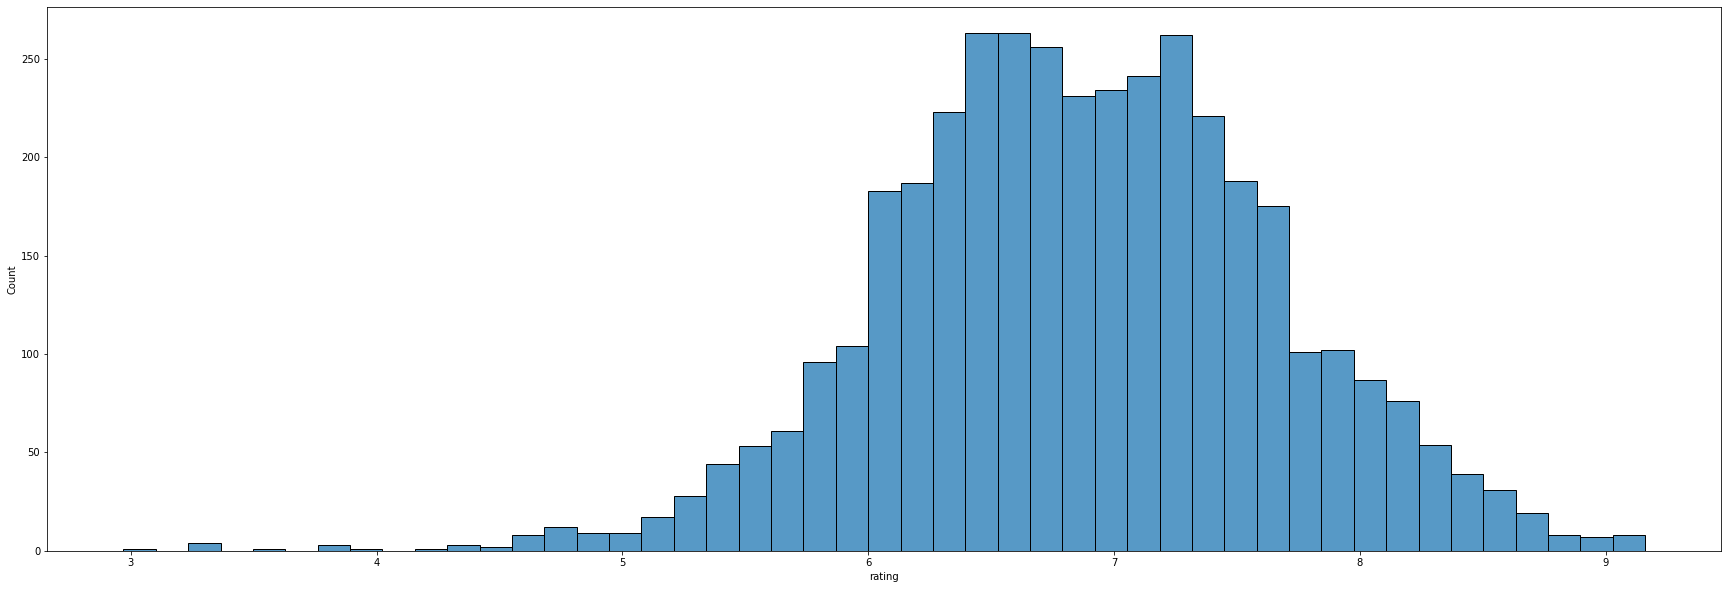

In [10]:
# Plot the distribution of the target variable
sns.histplot(data=df, x='rating')

As we can see, our data is slightly skewed to the left. Let's see if this has anything to do with the years of our data.

## Testing if Years are Significantly Different

Check distributions of each time period

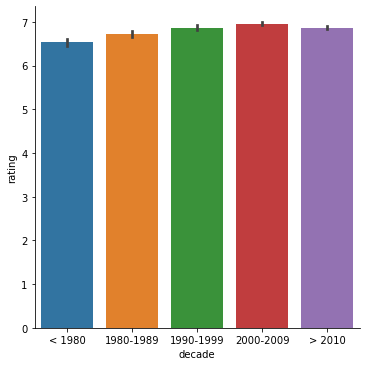

In [11]:
plot = sns.catplot(data=df, x='decade', y='rating', kind='bar', estimator=(lambda x: sum(x)/len(x)), legend=True, order=["< 1980", "1980-1989", "1990-1999","2000-2009","> 2010"])

The latter three time periods seem to be higher than "<1980" and "1980-1989." Let's run a One-Way ANOVA test to see if these populations are significantly different. We will take a random sample of 1000 rows from our dataset, and then look at the homogeniety and distribution of each group first.

In [12]:
import random
df_clean = df[['decade','rating']].dropna().reset_index(drop=True)
random.seed(30)
anime_index = random.sample(df_clean.index.values.tolist(), 1000)
sample_df = df_clean.iloc[anime_index, :]

In [13]:
# Check homogeneity of variance, ratio of largest to smallest sample stdev should be less than 2
sample_df.groupby('decade').std()

,rating
decade,
1980-1989,0.533801
1990-1999,0.669267
2000-2009,0.709792
< 1980,0.551067
> 2010,0.906142


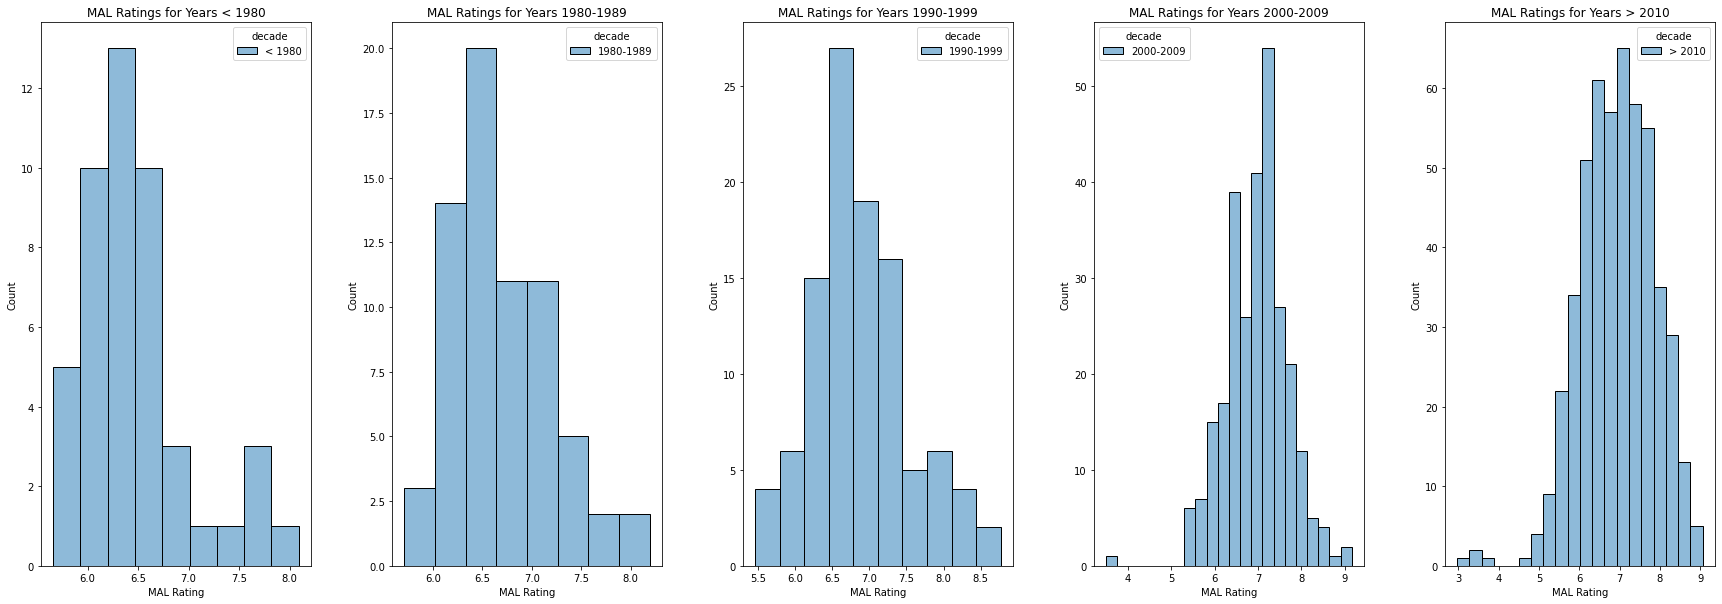

In [14]:
# Check normality of data
fig = plt.figure()
for axis, decade in zip([i for i in range(1, 6)], ["< 1980", "1980-1989", "1990-1999","2000-2009","> 2010"]):
    ax = fig.add_subplot(1, 5, axis)
    sns.histplot(data=sample_df.loc[sample_df.decade == decade], x='rating', hue='decade', ax=ax)
    ax.set(title=f"MAL Ratings for Years {decade}", xlabel="MAL Rating")

plt.show()

From these random samples, we can see that years < 1980 has a heavily left-skewed distribution, and years 1980-1989 appear to be bimodal. The remaining distributions have some skew (slightly left-skewed for 1990-1999, and somewhat left skewed for the remaining decades), however, they are relatively normal. So, we will only test the latter three populations. Now, we will conduct our **One-Way ANOVA test** with an **alpha value of 0.05.**

In [15]:
import scipy.stats as stats
stats.f_oneway(sample_df['rating'][sample_df['decade'] == "1990-1999"],
               sample_df['rating'][sample_df['decade'] == "2000-2009"],
               sample_df['rating'][sample_df['decade'] == "> 2010"])

F_onewayResult(statistic=0.4973704087533648, pvalue=0.6082981455111203)

Our **F-statistic is 2.60**, which results in a **p-value of 0.61**, which is above our alpha value. This means that our populations are NOT significantly different! Incorporating the earlier decades results in a significant difference, so, we will continue with our model incorporating years 1990-2021.

In [16]:
df2 = df.loc[df.year >= 1990]
df2.isnull().sum()

id                            0
title                         0
alternative_titles            0
start_date                    0
synopsis                      0
rating                      935
popularity                    0
status                        0
average_episode_duration      0
genres                        4
num_episodes                  0
studios                       0
source                      547
related_anime                 0
related_manga                 0
main_picture                  2
en_title                      0
title_len                     0
synopsis_len                  0
year                          0
decade                        0
genre_names                   4
studio_names                766
synop_pol                     0
title_pol                     0
synop_subj                    0
title_subj                    0
num_related_anime             0
num_related_manga             0
num_genres                    4
num_studios                 766
med_size

In [17]:
# Pickle our data
# df2.to_pickle("datasets/anime_1990-2021.p")
with open("datasets/anime_1990-2021.p", "rb") as f:
    df2 = pickle.load(f)
df2.head(3)

,id,title,alternative_titles,start_date,synopsis,rating,popularity,status,average_episode_duration,genres,...,title_pol,synop_subj,title_subj,num_related_anime,num_related_manga,num_genres,num_studios,med_size_pic,image_name,pic_colorfulness
0,5114,Fullmetal Alchemist: Brotherhood,{'synonyms': ['Hagane no Renkinjutsushi: Fullm...,2009-04-05,"""In order for something to be obtained, someth...",9.16,3,finished_airing,1460,"[{'id': 1, 'name': 'Action'}, {'id': 38, 'name...",...,0.0,0.486310,0.0,4,0,8.0,1.0,https://api-cdn.myanimelist.net/images/anime/1...,96541.jpg,32.794466
1,38524,Shingeki no Kyojin Season 3 Part 2,"{'synonyms': [], 'en': 'Attack on Titan Season...",2019-04-29,Seeking to restore humanity's diminishing hope...,9.10,36,finished_airing,1435,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",...,0.0,0.437778,0.0,3,0,7.0,1.0,https://api-cdn.myanimelist.net/images/anime/1...,100633.jpg,47.044056
2,9253,Steins;Gate,"{'synonyms': [], 'en': 'Steins;Gate', 'ja': 'S...",2011-04-06,The self-proclaimed mad scientist Rintarou Oka...,9.10,11,finished_airing,1460,"[{'id': 24, 'name': 'Sci-Fi'}, {'id': 40, 'nam...",...,0.0,0.426389,0.0,7,0,4.0,1.0,https://api-cdn.myanimelist.net/images/anime/5...,73199.jpg,30.904023


## Feature Importance

We can use sklearn's f_regression and mutual_info_regression to give us an idea of what features would be the most useful. In F-regression, the correlation between the variable and the target is first calculated. First, the mean is subtracted from every sample in X, where the correlation coefficient $r$ is calculated using the following formula:

## $R_{xy} = \frac{\Sigma x*y}{\Sigma x^2 * \Sigma y^2}$

Then, the R is converted into an F-statistic using the following:

## $F = \frac{R^2}{1 - R^2} * \frac{df_2}{df_1}$

In [19]:
from sklearn.feature_selection import f_regression

cont_features = ['average_episode_duration', 'num_episodes',
       'title_len', 'synopsis_len','synop_pol', 'title_pol', 'synop_subj', 'title_subj',
       'num_related_anime', 'num_genres', 'num_studios', 'pic_colorfulness']

f, p = f_regression(df2.dropna()[cont_features], df2.dropna()['rating'])

pd.DataFrame({
    'Feature':cont_features,
    'F-Score':f,
}).sort_values('F-Score', ascending=False).style.bar(subset=['F-Score'], color='grey')

,Feature,F-Score
0,average_episode_duration,659.228500
3,synopsis_len,443.744032
9,num_genres,319.041309
8,num_related_anime,151.090246
6,synop_subj,25.492484
10,num_studios,22.021808
7,title_subj,13.081036
11,pic_colorfulness,8.388660
1,num_episodes,7.608521
5,title_pol,0.569208


For now, we'll keep all of our variables and test our models with them, but we'll consider removing low-scoring variables later on when creating models.

# Choosing Import Genres, Studios, and Sources

Genres and Studios were extracted and placed into a list each. Genres, studios, and sources are all categorical and each class must have their own binary column for each variable. We will take advantage of the list format for genre and studio by using MultiLabelBinarizer()

In [20]:
features = ['rating', 'average_episode_duration', 'num_episodes',
       'title_len', 'synopsis_len','synop_pol', 'title_pol', 'synop_subj', 'title_subj',
       'num_related_anime', 'num_genres', 'num_studios', 'pic_colorfulness', 'studio_names', 'genre_names', 'source', 'popularity']
df_features = df2[features].reset_index(drop=True)
df_features.head(3)

,rating,average_episode_duration,num_episodes,title_len,synopsis_len,synop_pol,title_pol,synop_subj,title_subj,num_related_anime,num_genres,num_studios,pic_colorfulness,studio_names,genre_names,source,popularity
0,9.16,1460,64,29,1144,-0.021627,0.0,0.486310,0.0,4,8.0,1.0,32.794466,[Bones],"[Action, Military, Adventure, Comedy, Drama, M...",manga,3
1,9.10,1435,10,25,698,-0.041019,0.0,0.437778,0.0,3,7.0,1.0,47.044056,[Wit Studio],"[Action, Drama, Fantasy, Military, Mystery, Sh...",manga,36
2,9.10,1460,24,10,967,-0.029167,0.0,0.426389,0.0,7,4.0,1.0,30.904023,[White Fox],"[Sci-Fi, Psychological, Drama, Thriller]",visual_novel,11


In [21]:
# Function for putting NaN values in a list so that MultiLabelBinarizer can be used
def nan_to_list(value) -> list:
    try:
        len(value)
        return value
    except TypeError:
        return ["nan"]

# Apply function
df_features['studio_names'] = df_features.studio_names.apply(nan_to_list)
df_features['genre_names'] = df_features.genre_names.apply(nan_to_list)

## Genre MultiLabelBinarizer

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb_genres = MultiLabelBinarizer()

df_genres = pd.DataFrame(mlb_genres.fit_transform(df_features.genre_names),columns=mlb_genres.classes_, index=df_features.index)
df_genres.head(3)

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,nan
0,1,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
# If a column is positive for NaN, then all the columns are considered NaN
df_genres.loc[df_genres.nan == 1] = np.nan
df_genres.loc[df_genres.nan.isna()]

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,nan
3603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We don't want a massive list of genres in our model, as it would crank up the dimensionality by a ludicrous amount. So, we'll run the F-regression and MI regression to see which genres are the most useful, then bin everything else into an "other genres" category

In [24]:
df_genre_scores = pd.concat([df_features['rating'], df_genres], axis=1).dropna()

f, p = f_regression(df_genre_scores[df_genres.columns], df_genre_scores['rating'])

pd.DataFrame({
    'Feature':df_genres.columns,
    'F-Score':f,
}).sort_values('F-Score', ascending=False).style.bar(subset=['F-Score'], color='grey')

C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,Feature,F-Score
6,Drama,211.453967
31,Shounen,122.272142
14,Kids,100.017544
20,Mystery,68.600801
23,Psychological,56.736162
37,Supernatural,55.526894
28,Seinen,54.835704
24,Romance,50.509626
38,Thriller,48.649678
26,School,41.413953


## Studio MultiLabelBInarizer

We will repeat the same steps for studios

In [25]:
mlb_studio = MultiLabelBinarizer()

df_studio = pd.DataFrame(mlb_studio.fit_transform(df_features.studio_names),columns=mlb_studio.classes_, index=df_features.index)
df_studio

,10Gauge,2:10 AM Animation,33 Collective,3xCube,8bit,A-1 Pictures,A-Real,A.C.G.T.,ACC Production,AIC,...,drop,dwarf,feel.,helo.inc,ixtl,l-a-unch・BOX,nan,production doA,teamKG,ufotable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4409,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_studio.loc[df_studio.nan == 1] = np.nan
df_studio.loc[df_studio.nan.isna()].head(5)

,10Gauge,2:10 AM Animation,33 Collective,3xCube,8bit,A-1 Pictures,A-Real,A.C.G.T.,ACC Production,AIC,...,drop,dwarf,feel.,helo.inc,ixtl,l-a-unch・BOX,nan,production doA,teamKG,ufotable
1091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This time, we will consider multiplying the scores by the number of anime a studio has made. This is because there are some studios that have high scores, but are involved in very few anime, and thus would make our model poor at generalization. So, we'll pic anime with high scores multiplied by the number of anime that studio has been involved in.

In [27]:
df_studio_scores = pd.concat([df_features['rating'], df_studio], axis=1)
df_studio_scores = df_studio_scores.dropna()

f, p = f_regression(df_studio_scores[df_studio.columns], df_studio_scores['rating'])

studio_f_scores = pd.DataFrame({
    'Feature':df_studio.columns,
    'F-Score':f,
    'Total Anime': df_studio_scores[df_studio.columns].sum(),
}).sort_values('F-Score', ascending=False)

quantile = np.quantile(studio_f_scores['Total Anime'], 0.90)

studio_f_scores.loc[studio_f_scores["Total Anime"] >= quantile].style.bar(subset=['F-Score', 'Total Anime'], color='grey')

C:\Users\Brennan\anaconda3\envs\mal\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


,Feature,F-Score,Total Anime
DLE,DLE,38.125339,27.000000
Production I.G,Production I.G,37.461183,74.000000
Bones,Bones,36.439764,58.000000
Seven,Seven,34.282102,28.000000
Kyoto Animation,Kyoto Animation,34.187021,28.000000
Madhouse,Madhouse,30.135384,142.000000
A-1 Pictures,A-1 Pictures,26.336832,92.000000
Shaft,Shaft,21.866387,52.000000
J.C.Staff,J.C.Staff,15.135933,150.000000
TNK,TNK,10.948591,26.000000


## Source OneHotEncoder

The source feature is much simplier; it only requires one hot encoding to use as a feature. Again, we want to reduce dimensionality as much as possible so we'll group similar source classes together.

In [28]:
from sklearn.preprocessing import OneHotEncoder

mlb_source = OneHotEncoder(sparse=False)

df_source = pd.DataFrame(mlb_source.fit_transform(df_features[['source']].dropna()), columns=mlb_source.categories_[0])
df_source.shape

(3865, 15)

In [29]:
df_source_scores = pd.concat([df_features[df_features['source'].notna()]['rating'], df_source], axis=1)
df_source_scores = df_source_scores.dropna()

f, p = f_regression(df_source_scores[df_source.columns], df_source_scores['rating'])

pd.DataFrame({
    'Feature':df_source.columns,
    'F-Score':f,
    'Total Anime': df_source_scores[df_source.columns].sum()
}).sort_values('F-Score', ascending=False).head(20).style.bar(subset=['F-Score', 'Total Anime'], color='grey')

,Feature,F-Score,Total Anime
manga,manga,301.091221,1193.000000
original,original,175.267413,842.000000
picture_book,picture_book,100.346423,30.000000
light_novel,light_novel,53.751135,327.000000
other,other,45.707402,106.000000
game,game,37.826882,231.000000
digital_manga,digital_manga,8.854142,6.000000
card_game,card_game,6.889878,39.000000
music,music,3.297492,13.000000
visual_novel,visual_novel,2.313525,150.000000


In [30]:
# Based on the feature analysis, we will bin the sources into four categories
def bin_source(source: str) -> str:
    if pd.isnull(source):
        return np.nan
    elif source == 'original':
        return source
    elif source in ['manga', '4_koma_manga', 'web_manga']:
        return 'manga'
    elif source in ['light_novel', 'novel', 'book', 'visual_novel', 'picture_book']:
        return 'novel/book'
    else:
        return 'other'

In [31]:
# Best studios
top_studios = ["Bones", "Production I.G", "A-1 Pictures", "Madhouse", "Kyoto Animation", 'Shaft', 'DLE', "J.C.Staff"]

# Best Genres
top_genres = ["Drama", "Shounen", "Kids", "Mystery", "Psychological", "Supernatural"]

# Bin the other studios and genres into their own "other" category
df_studio['other_studio'] = [1 if result == True else 0 for result in (df_studio.drop(top_studios, axis=1) == 1).any(axis=1)]
df_genres['other_genres'] = [1 if result == True else 0 for result in (df_genres.drop(top_genres, axis=1) == 1).any(axis=1)]

top_studios.append('other_studio')
top_genres.append('other_genres')

In [32]:
# Replace genre_names,studio_names, and source with specific genres, studios, and sources
df_features = pd.concat([df_features, df_studio[top_studios], df_genres[top_genres]], axis=1)
df_features = df_features.drop(['genre_names', 'studio_names'], axis=1)
df_features['source'] = df_features['source'].apply(bin_source)
df_features

,rating,average_episode_duration,num_episodes,title_len,synopsis_len,synop_pol,title_pol,synop_subj,title_subj,num_related_anime,...,DLE,J.C.Staff,other_studio,Drama,Shounen,Kids,Mystery,Psychological,Supernatural,other_genres
0,9.16,1460,64,29,1144,-0.021627,0.0,0.486310,0.0,4,...,0.0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,9.10,1435,10,25,698,-0.041019,0.0,0.437778,0.0,3,...,0.0,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,1
2,9.10,1460,24,10,967,-0.029167,0.0,0.426389,0.0,7,...,0.0,0.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1
3,9.09,1440,51,14,972,0.061111,0.0,0.500397,0.0,5,...,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1
4,9.08,1380,13,20,834,-0.114732,0.0,0.402679,1.0,1,...,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4407,NaN,60,66,20,118,0.283333,0.0,0.591667,0.0,1,...,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,1
4408,NaN,240,4,8,324,0.080000,0.0,0.160000,0.0,2,...,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,1
4409,NaN,798,52,9,528,-0.007366,0.0,0.574777,0.0,0,...,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,1
4410,NaN,600,225,13,180,0.000000,0.0,0.000000,0.0,0,...,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1


In [33]:
# Pickle our data
df_features.to_pickle("datasets/anime_features.p")
# with open("datasets/anime_features.p", "rb") as f:
#     df_features = pickle.load(f)
# df_features

# Normalizing Data and Looking at Trends

We want our target variable to be normally distributed, so let's look at it again.

<AxesSubplot:xlabel='rating', ylabel='Count'>

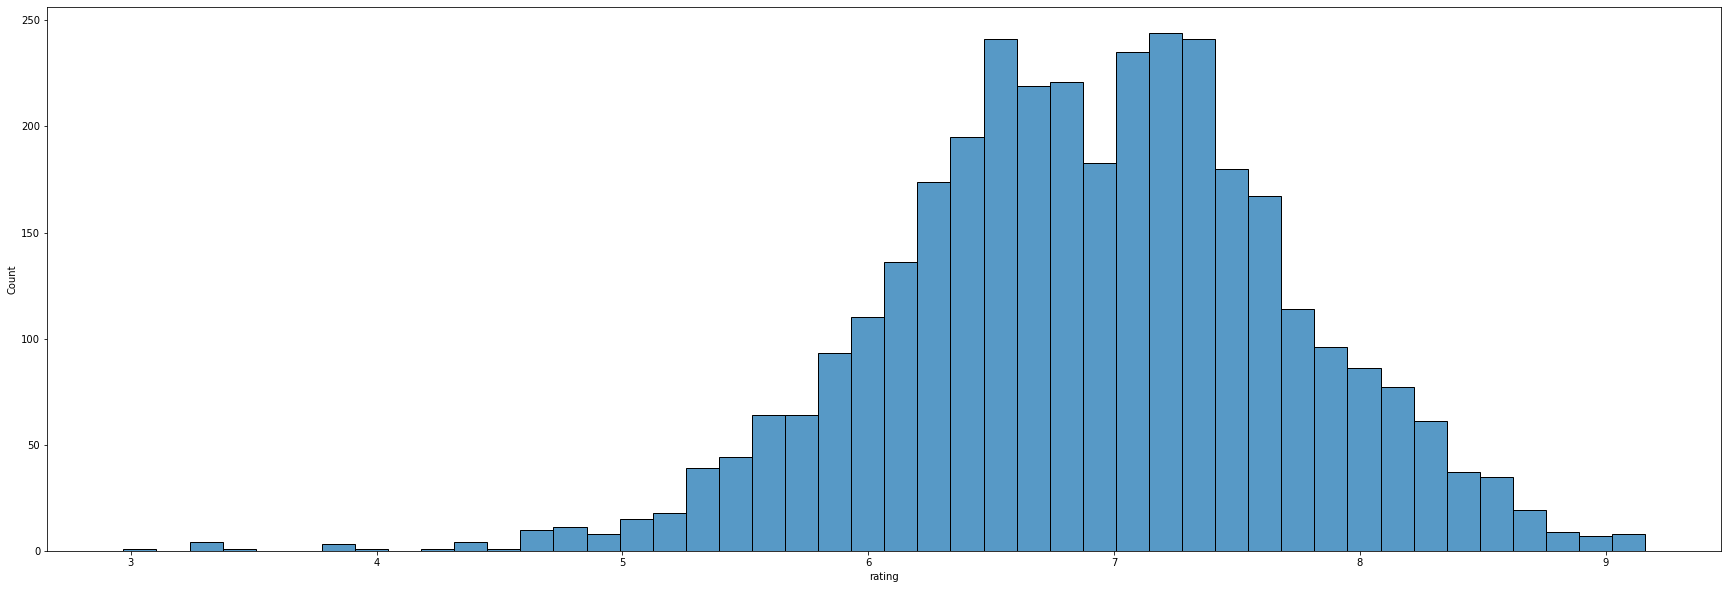

In [34]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams['figure.subplot.wspace'] = 0.3
plt.rcParams['figure.subplot.hspace'] = 0.7
sns.histplot(data=df_features, x='rating')

Again, it appears to be slightly skewed to the left. Now that we picked the time periods we want, we can remove outliers using the IQR.

In [35]:
# Creating the the "outlier" variable to add/subtract to Q3/Q1
Q3 = df_features['rating'].describe()['75%']
Q1 = df_features['rating'].describe()['25%']
IQR = Q3 - Q1
outlier = IQR * 1.5

In [36]:
# Create df4, containing non-outlier data
df4 = df_features.loc[(df_features['rating'] > Q1 - outlier) & (df_features['rating'] < Q3 + outlier)]
df4.head(5)

,rating,average_episode_duration,num_episodes,title_len,synopsis_len,synop_pol,title_pol,synop_subj,title_subj,num_related_anime,...,DLE,J.C.Staff,other_studio,Drama,Shounen,Kids,Mystery,Psychological,Supernatural,other_genres
9,8.98,1500,22,30,802,0.068571,0.0,0.386190,0.0,2,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1
10,8.95,1460,24,17,786,-0.030022,0.0,0.568063,0.0,3,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1
11,8.95,1494,201,7,680,0.162500,0.0,0.634226,0.0,12,...,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,1
12,8.94,1435,16,24,673,-0.020000,0.0,0.659167,1.0,2,...,0.0,0.0,1,1.0,1.0,0.0,1.0,0.0,0.0,1
13,8.91,1350,7,27,583,0.036250,0.0,0.411667,0.0,4,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0,1


<AxesSubplot:xlabel='rating', ylabel='Count'>

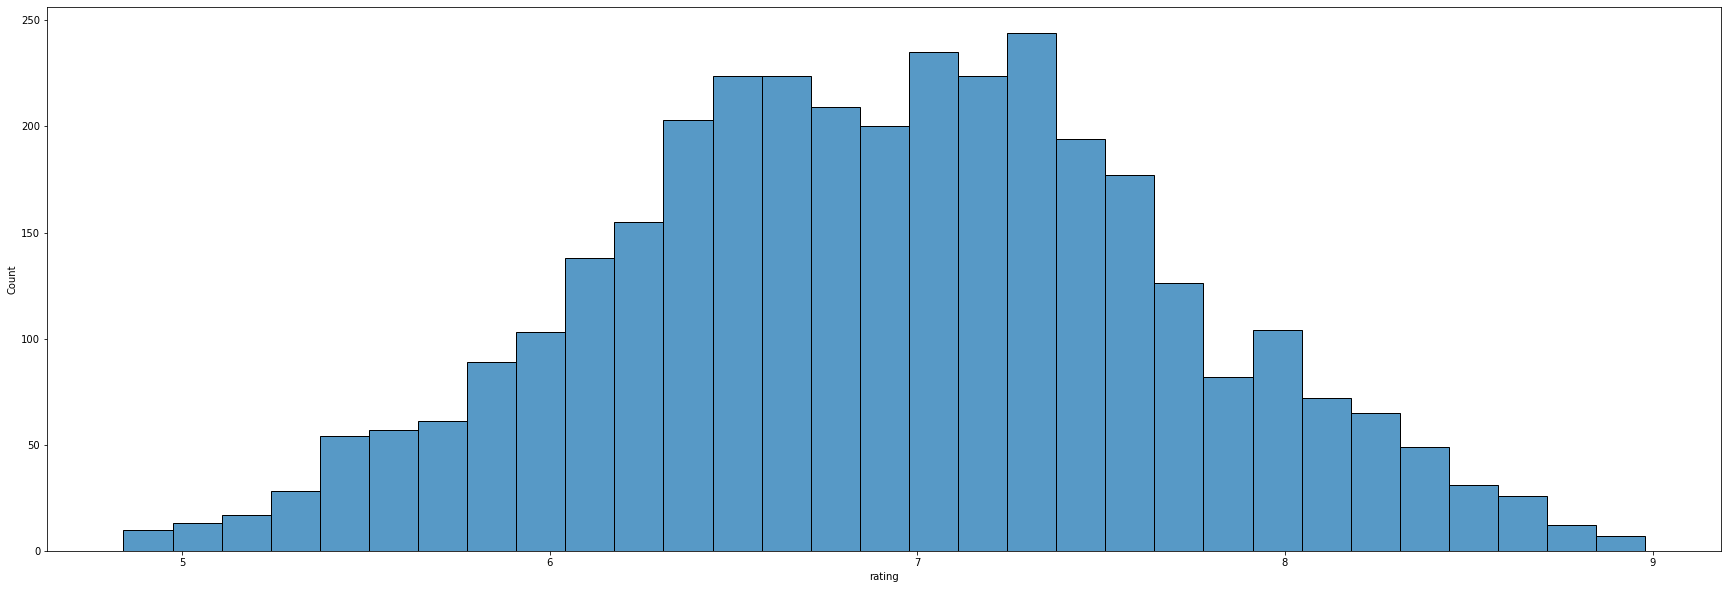

In [37]:
# Observe the new distribution
sns.histplot(data=df4, x='rating')

Clearly, the dataset has now been normalized. Now, we can look at some trends.

In [38]:
# Pickle our data
df4.to_pickle("datasets/anime_normal.p")
# with open("datasets/anime_normal.p", "rb") as f:
#     df4 = pickle.load(f)
# df4

<AxesSubplot:xlabel='synopsis_len', ylabel='rating'>

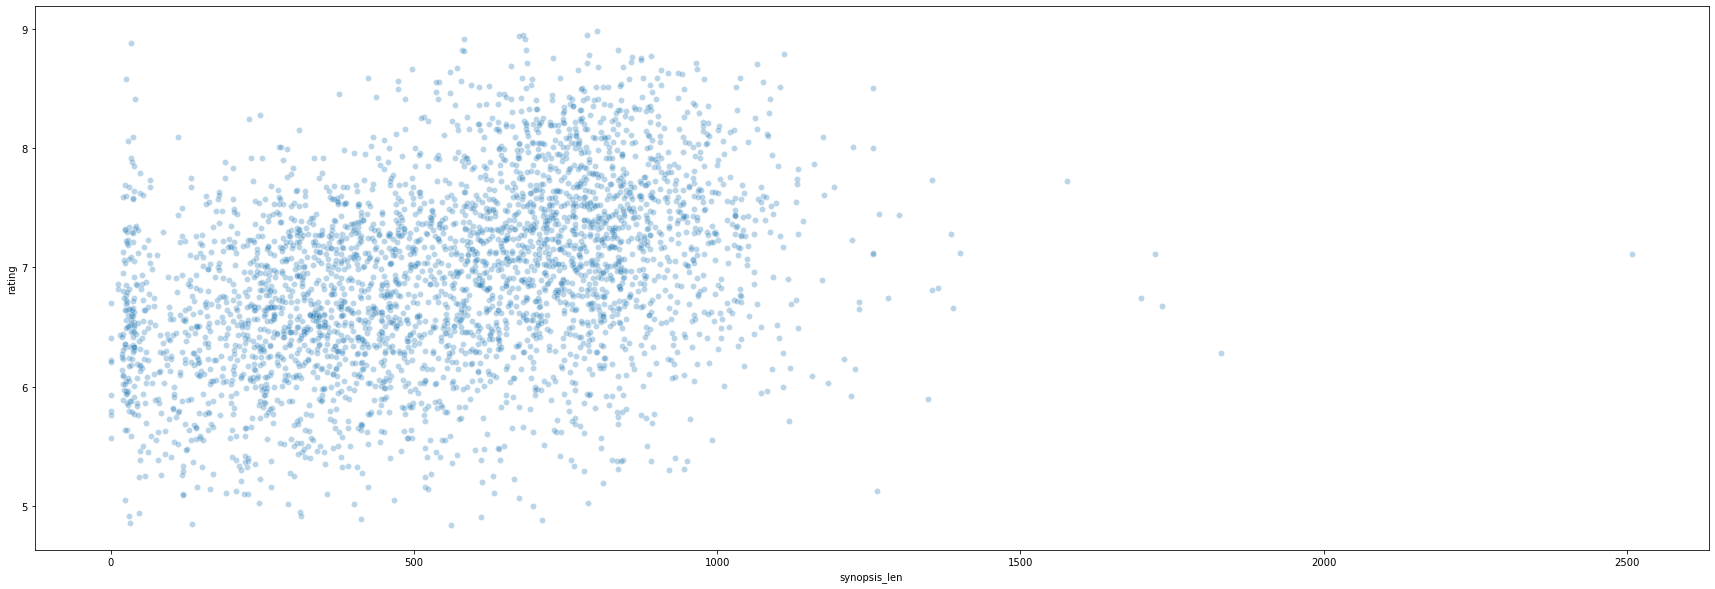

In [40]:
# Plot synopsis_len vs rating
sns.scatterplot(data=df4, x='synopsis_len', y='rating', alpha=0.3)

<AxesSubplot:xlabel='num_genres', ylabel='rating'>

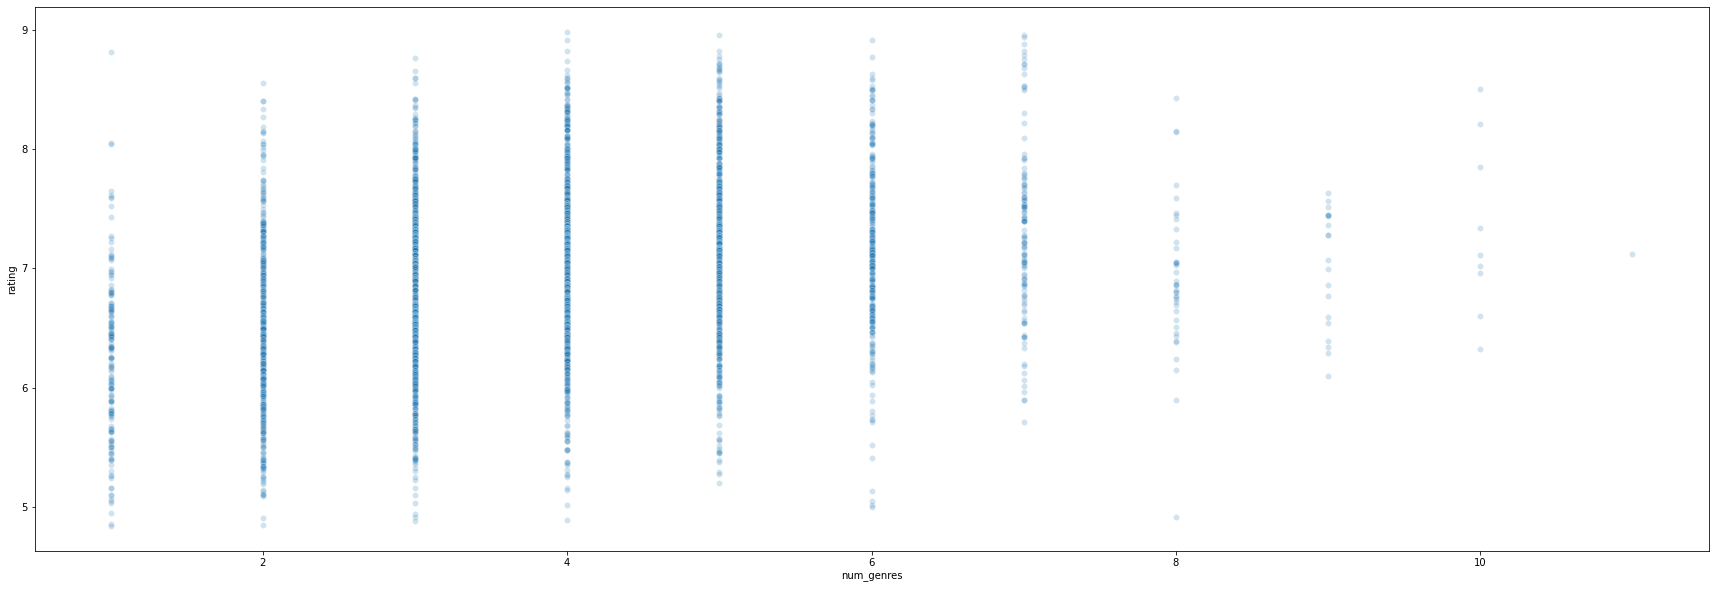

In [42]:
# Plot num_genres vs rating
sns.scatterplot(x=df4['num_genres'], y=df4['rating'], alpha=0.2)